# 1 - Redes recurrentes orientadas al procesamiento de lenguaje natural

**Sumario**

1. Introducción
2. Procesamiento de lenguaje natural
3. Redes neuronales recurrentes (RNN)
4. Encoders - Decoders
5. Modelos de atención
6. Transformers
7. Construcción de una red recurrente

## 1.1 - Introducción

En los capítulos anteriores hemos estudiado modelos de razonamiento basados en redes neuronales capaces de predecir, por ejemplo,  si un cierto animal se encuentra en una fotografía o si una casa de segunda mano se puede vender por un determinado precio.

En ambos casos, nuestros modelos trataban de identificar patrones durante la fase de entrenamiento mediante la asuncion de que las instancias  de entrenamiento eran individuales, independientes e identicamente distribuidas (**i.i.d**). Es decir, que **no había concepto de tiempo**.

No obstante, hay determinados procesos donde esta asunción no se cumple, ya que la información de que cada una de ellas representa depende considerablemente de las instancias anteriores y posteriores desde una perspectiva temporal. Por ejemplo, cuando estamos utilizando el lenguaje natural, el significado de cada una de las palabras que usamos depende en gran medida tant de las palabras anteriores, como de las posteriores e, incluso, del contexto o de la entonación de la persona que está hablando.

El lenguaje natural no es la única área donde tiene importancia el tiempo, otras tareas de ML incluyen:
* Composición musical
* Predicción de precio en el stock Market
* Conducción automática de vehiculos 
* etc.

Con todo, entre todas las áreas donde las redes neuronales recurrentes han destacado significativamente, sobresale el área del **procesamiento de lenguaje natural** debido a su relación directa el ser humano y el conocimiento. 

El procesamiento de lenguaje natural es un área relativamente moderna dada la dificulta que supone interpretar un texto complejo o una conversación. A pesar de esto, ha evolucionado a una velocidad pasmosa, sobretodo gracias a las redes neuronales.

Durante los primeros años, los diferentes métodos que se utilizaban estaban totalmente orientados al análisis de textos mediante **"bolsas de palabras"** (i.e., *Bag of words*, BOW por sus singlas en inglés). Así, cada documento equivalía a una bolsa y se utilizaba como entrada del algoritmo de aprendizaje con el objetivo de construir modelos de identificación. En aquel momento, las tareas principales de investigación eran:
* Búsqueda de textos en documentos.
* Agrupación de documentos similares.
* Clasificación de textos (e.g., noticias, historia, positivo-negativo, etc.).

Con la aparición de las redes neuronales recurrentes y de las capas tipo *embedding* (representaciones númericas del texto en forma matricial), se expandió enormemente el campo, permitiendo no solo mejores resultados en texto escrito, sino también el procesamiento de lenguaje natural hablado.

Ya en 2017, surge una nueva arquitectura de red neuronal que pone el campo patas arriba denominada ***transformer***. Donde se sustituyen las capas de tipo recurrente por un nuevo tipo denominado **capa de atención**. Esta capa permite codificar cada palabra en función del resto de la frase o secuencia **sin incurrir en los problemas de "olvido"** que muestran las redes recurrentes. Para ello, uso embeddings contextuales, que introducen el contexto en la representación matemática del texto dentro de la red.

A lo largo de este capítulo, describiremos aquellos conceptos básicos asociados al procesamiento del lenguaje natural que son necesarios para la construcción de redes de neuronas profundas de tipo recurrente. A continuación, nos ocuparemos del concepto de redes recurrentes e identificaremos los diferentes tipos de capas (recurrentes, LTSM, GRU, atención), así como las distintas arquitecturas destinadas a la construcción de modelos que permitan procesar series temporales y texto tanto hablado como escrito.

## 1.2 - Procesamiento de lenguaje natural

El procesamiento del lenguaje natural (*Natural Language Processing*, NLP por sus siglas en inglés) es un área de la inteligencia artificial centrada en crear sistemas capaces de interacturar con seres humanos en su mismo lenguaje, tanto de manera escrita como hablada (en este sentido, el lenguaje hablado debe ser primero transformado a lenguaje escrito mediante técnicas de reconocimiento de sonido).

Por tanto el área de NLP surge como la combinación de la lingüística y la inteligencia artificial, dando lugar a dos linear de trabajo:

* **Generación de lenguaje natural** (*Natural Language Generation*, NLG por sus siglas en inglés).
* **Entendimiento de lenguaje natural** (*Natural Language Understanding*, NLU por sus siglas en inglés). 

El procesamiento de lenguaje natural se aplica en multitud de aplicaciones:
* Elaboración de resúmenes de texto.
* Sugerencias de palabras en los procesos de escritura para mensajes o emails.
* Traducción de textos.
* Reconocimiento de entidades como marcas, lugares, empresas, celebridades, etc.
* Análisis de sentimientos con el objetivo de identificar el "tono" de un texto (e.g., positivo o negativo)
* etc.

El procesamiento del lenguaje nautural comenzó a aplicarse mediante enfoques basados en reglas definidas por expertos en lingüística. Pero como hemos visto en capítulos anteriores, las redes neuronales necesitan representaciones numéricas. De manera que se desarollaron dos enfoques capaces de representar la información textual de manera numérica.

**Enfoque léxico**, donde la información era modelada según su frecuencia de aparición en el texto. Esto puede ser de manera individual o agrupando grupos de palabras (i.e., *bag of words*).  En tal caso, se hace algo similar a una **codificación one-hot que asocia el grupo con frecuencia**.

**Enfoque semántico**, donde la información se modela en base a un **vector numérico multidimensional** que describe cada palabra a partir de unas "características" identificadas por una red neuronal.

### 1.2.1 - Bags of words

El proceso de generación de una bolsa de palabras, se fundamente en el siguiente proceso:

1. Se realiza una **"tokenización" del documento**, es decir, se extraen todas las palabras del documento (o subpalabras).

2. Se aplica un método de **conteo de palabras**. Dicho resultado puede ser normalizado. Por ejemplo mediante el uso de la técnica TF-IDF (Term Frequency - Inverse Document Frequency), que ajusta la frecuencia de un término (TF) mediante su frecuencia en **todos** los documentos. De tal forma que aquellas palabras que aparecen mucho en un documento pero también aparecen en otros documentos no tienen tanto importancia (e.g., "el", "la", "yo", etc.)

Para explicar brevemente esta técnica, consideremos que tenemos 3 "documentos" que representan reviews sobre películas:

* **Review 1:** This movie is very scary and long
* **Review 2:** This movie is not scary and is slow
* **Review 3:** This movie is spooky and good

<img src="images_1/tf_idf_example.png" width="500" data-align="center">

$$
\begin{align*}
\text{TF}_{d}(t) &= \frac{N_{d}(t)}{N_{d}} \\
\text{IDF}(t) &= \log \frac{D}{D(t)} \\
\text{TF-IDF}(t,d) &= \text{TF}_{d}(t) * \text{IDF}(t)
\end{align*}
$$

donde:
* $N_{d}(t)$ representa el número de apariciones del término $t$ en el documento $d$.
* $N_{d}$ representa el número total de términos en el documento $d$.
* $D$ representa el número total de documentos.
* $D(t)$ representa el número de documentos con el término $t$.

Inicialmente, este tipo de técnica se convirtió en una buena solución, pero tiene dos principales limitaciones:
* No se recoge ningún tipo de información relativa al orden o al **contexto de las palabras** dentro del documento.
* La **representación *sparse*** resultante aumenta cuadráticamente con respecto al tamaño del vocabulario y el número de documentos, lo que lo hace **computacionalmente problemático**. 

### 1.2.2 - Embeddings

Con el objetivo de eliminar las limitaciones que presentaba el sistema basado en bolsas de palabras, tanto en lo que se refiere a la calidad de la información como a su tamaño de representación se desarrolló el sistema de *embeddings*.

Esta técnica busca construir una representación más compacta (i.e., densa) que nos permita reflejar mejor la información, así como las relaciones entre las diferentes palabras.

De esta forma, se asigna a cada palabra (independientemente a que documento pertenezca) un vector continuo de $n$ dimensiones. La distancia existente en este espacio vectorial entre palabras denota similitud semántica.

Por ejemplo, imaginemos que tenemos un embedding de 50 dimensiones con un vocabulario de 20.000 palabras en inglés. Entre ellas podria estar la palabra *king* con el siguiente vector de valores que oscilan entre $1.6$ y $-1.6$:

<img src="images_1/embedding_king.jpg" width="700" data-align="center">

Existen diversas técnicas para la construcción de embeddings. La mayor parte de ellas utilizan aprendizaje automático con redes neuronales. En este sentido, **el objetivo es "rellenar" la matriz de valores de tamaño $V * n$**, donde $V$ es el tamaño del vocabulario y $n$ el número de dimensiones a considerar.

Una técnica muy conocida es ***Word2Vec***, la cual consiste en una red neuronal con dos capas:
* Una capa de proyección (i.e., el *embedding*) que representa la matriz anterior. Inicialmente con valores aleatorios.
* Una capa densa con una función de activación *softmax*. El número de conexiones es igual al número de dimensiones en nuestra capa de embedding, es decir, $n$.

La manera en la cual se aprende esta red neuronal es mediante una tecnica de predicción de palabras en el corpus. Es decir, partimos de una o varias palabras del texto y queremos que el modelo prediga una o varias palabras cercanas.

Existen dos arquitecturas específicas del tipo ***Word2Vec***, dependiendo de la entrada y del tipo específico de salida que queramos generar:

* [**Bolsa de palabras continua (CBOW)**](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html). Se predice una palabra a partir del contexto. Queremos que el modelo modifique los valores del embedding de tal manera que pueda predecir correctamente cual es la palabra del vocabulario a partir de sus palabras anteriores y posteriores.

* [***Skip-gram***](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html). Funciona de manera opuesta a CBOW, ya que nos permite predecir el contexto a partir de un determinado término.

<img src="images_1/word2vec_architectures.png" width="500" data-align="center">


<table>
    <tr>
        <th>Ejemplo CBOW</th>
    </tr>
    <tr>
        <td><img src="images_1/cbow.jpg" width="700" data-align="center">></td>
    </tr>
</table>

<table>
    <tr>
        <th>Ejemplo Skip-gram</th>
    </tr>
    <tr>
        <td><img src="images_1/skipgram_example.png" width="300" data-align="center"></td>
    </tr>
</table>

Presentar un ejemplo de skip-gram es más complicado ya que es menos visual. En este caso, hemos definido un tamaño de contexto de 1, de manera que dada una palabra, predecimos si otra tiene sentido como "contexto" de la primera.

----

**Nota:** [Google ofrece modelos ya entrenados de Word2Vec que contienen embeddings de 300 dimensiones para tres millones palabras y frases](https://code.google.com/archive/p/word2vec/).

----

Además de Word2Vec existen otros modelos similares:

* **GloVe**. Se basa en el conteo. De tal manera que se determina cuántas veces aparece una palabra en un contexto específico.
* **LexVec**. Combina GloVe y Word2Vec. Existen diferentes versiones ya que ha ido evolucionando con el tiempo (a diferencia de los anteriores).

Poco a poco, los sistemas de embedding comenzaron a utilizarse no solo por su cuenta (para medir la distancia entre palabras) sino también como capas de redes neuronales más complejas, lo que supuso una mejora en las tareas de NLP, especialmente cuando dichos embeddings ya estaban pre-entrenados (como el caso propuesto por Google).

## 1.3 - Redes neuronales recurrentes

Las redes neuronales recurrentes (*Recurrent Neural Networks*, RNNs por sus siglas en inglés) son un tipo de redes de neuronas que contienen, al menos, un ciclo dentro de sus conexiones de red. Es decir, **algunas de las neuronas de la red utilizan su propia salida o la salida de neuronas anteriores a ellas en la estructura de la red**.

De esta forma, **la información ya no fluye en una única dirección**, como observábamos en las redes de tipo *feed-forward*, sino en ambos sentidos, hacia delante y parcialmente hacia atrás.

La utilización de los procesos de retroalimentación de la salida permite a este tipo de redes contar con **ciertas características de "memoria"** en tareas de NLP.

En base a su complejidad, podemos dividir las RNNs en dos grandes categorías:

* RNNs simples.
* RNNs complejas.

### 1.3.1 - Redes recurrentes simples

Las redes recurrentes simples poseen una retroalimenación sencilla ya que solo incluyen el resultado de la neurona inmediatamente anterior.

En la siguiente figura se muestra el funcionamiento de una red recurrente representada de manera compacta y desenrollada para cada instante de tiempo $t$:

<img src="images_1/rnn_simple.png" width="500" data-align="center">

Por tanto, para el instante de tiempo $t=0$, la neurona solo utiliza como entrada la información externa, pero a partir de instante de tiempo $t=1$, la neurona utiliza como entrada la información externa como la salida para el instante de tiempo $t-1$.

A continuación se presenta una versión esquematizada de una neurona recurrente simple:

<img src="images_1/neurona_simple.png" width="300" data-align="center">

Como se puede observar en la siguiente figura, la neurona ya no solo usa la información de entrada, sino tambien el resultado obtenido para la entrada anterior, definido como $h_{t-1}$.

#### Funcionamiento de una red recurrente simple

Para explicar de manera sencilla su funcionamiento, vamos a desenrollar una red recurrente sencilla formada por una única neurona en una secuencia temporal de $T$ pasos, comenzando con el paso anterior al actual (i.e., $t-1$).

<img src="images_1/rnn_simple_explained.png" width="500" data-align="center">

En este ejemplo, se pueden observar tres capas de neuronas:

* **Capa de entrada**, que se corresponde con la información de entrada a la red y que, en el caso de NLP suele ser una palabra, la cual suele ser traducida a un vector numérico mediante un *embedding*. Se indica como $x(t)$.

* **Un número finito de capas densas ocultas**. En este caso mostramos una única capa oculta, pero la información de entrada y el estado anterior podrian ser combinados y pasar por múltiples de ellas antes de ser expulsados. La salida de esta capa será utilizada como entrada de la capa siguiente, representa el "estado" de la red o "memoria". Se indica como $h(t)$.

* **Capa de salida**. La salida de la red para el instante $t$. Por ejemplo, si utilizamos una RNN para predecir el token más probable a partir de una frase tendriamos en cada momento algo de este estilo:

<img src="images_1/rnn_simple_example.jpg" width="700" data-align="center">

Los diferentes elementos matemáticos que se presentan son:
* $x(t)$, $h(t)$ e $y(t)$ se corresponden con la entrada, el estado oculto y la salida de la red, respectivamente.
* $W_{hh}$ es la matriz de peso que conecta las neuronas de la capa oculta consigo mismas simulando el proceso de memoria a corto plazo.
* $W_{xh}$ es la matriz de peso que conecta las neuronas de la capa de entrada con las neuronas de la capa oculta.
* $W_{hy}$ es la matriz de peso que conecta las neuronas de la capa oculta con las neuronas de la capa de salida.

### 1.3.2 - Redes recurrentes complejas

El problema de las RNN simples es que pueden sufrir el problem del "desvanecimiento de gradiente". Esto ocurre porque cuanto mayor sea el número de instantes de tiempo que tengamos, mas "larga" será la red.

El problema del desvanecimiento de gradiente se muestra en el hecho de que las RNNs simples se "olvidan" de información a largo plazo. Por ejemplo, en el ámbito de NLP, **la información del inicio de la frase/párrafo tiende a ser "olvidada"** y solo se centran en las palabras más cercanas a la que esta siendo evaluada en ese momento.

Para paliar este problema, se desarrollaron dos neuronas más complejas:

* *Long Short-Term Memory* (LSTM).
* *Gated Recurrent Unit* (GRU).

----

**Nota:** En esta sección solo vamos comentar brevemente ambas arquitecturas. [**Recomiendo leer el capítulo 12 del libro de FastAI (gratuito)**](https://github.com/fastai/fastbook/blob/master/12_nlp_dive.ipynb)

----

#### Long Short-Term Memory (LSTM)

Las neuronas de tipo ***Long Short-Term Memory*** (LSTM) fueron introducidas por Hochreiter y Schmidhuber en 1997 con el propósito de resolver estos problemas de dependencias a largo plazo.

Este nuevo tipo de neurona cuenta con no uno sino dos estados ocultos:
* El estado oculto $h$ que se encarga de combinar la información de "corto plazo" con el input del token actual.
* El estado oculto $c$ (i.e., *cell state*) que se encarga de almacenar la información de "largo plazo".

<img src="images_1/lstm_diagram.png" width="450" data-align="center">

La primera puerta se llama **la puerta del olvido** (*forget gate*). Dado que es una capa lineal seguida de un sigmoide, su salida consistirá en escalares entre 0 y 1. Multiplicamos este resultado por el estado de la celda para determinar qué información conservar y cuál descartar: los valores más cercanos a 0 se "descartan". Esto le da al LSTM la capacidad de "olvidar" cosas sobre su estado a largo plazo.

La segunda puerta se llama **puerta de entrada** (*input gate*). Cuenta con una "puerta interna", que a veces se denomina **puerta de celda** (*cell gate*), para actualizar el estado de la celda. Similar a la puerta de olvido, la puerta de entrada decide qué elementos del estado de la celda actualizar (valores cercanos a 1) y la puerta de la celda determina cuáles son esos valores de actualización, en el rango de -1 a 1 (tanh). Por ejemplo, es posible que veamos un nuevo pronombre de género, en cuyo caso necesitaremos reemplazar la información sobre el género que la puerta de olvido "eliminó" (poner cerca de 0).

La última puerta es la **puerta de salida** (*output gate*). Determina qué información del estado de la celda usar para generar la salida (para la siguiente palabra). el estado de la celda pasa por un tanh antes de combinarse con la salida sigmoidea de la puerta de salida, y el resultado es el nuevo estado oculto.

#### Gated recurrent units

Las neuronas de tipo LSTM ofrecían grandes resultados, pero presentaban una elevada complejidad. Para simplificar
su funcionamiento, se introdujeron las neuronas ***Gated Recurrent Units*** (GRU), que proporcionaban resultados similares a las neuronas LSTM, aunque con una estructura mucho más sencilla conformada únicamente por dos puertas y sin la necesidad de utilizar dos estados ocultos.

<img src="images_1/gru_diagram.png" width="450" data-align="center">

La **puerta de reinicio** (*reset gate*) funciona de forma similar a la de olvido de la LSTM pero usa el estado oculto del instante anterior $h_{t-1}$.

La **puerta nueva** (*new gate*) funciona de forma similar a la **puerta de entrada** de la LSTM. Se combina la información de entrada $x_{t}$ con el estado oculto del instante anterior $h_{t-1}$ (tras el reinicio).

La **puerta de actualización** (*update gate*) selecciona el "grado de importancia" del estado oculto anterior $h_{t-1}$. Tiene ciertas similitudes con la puerta de reinicio.

## 1.4 - Encoders-Decoders

Uno de los principales avances logrados en el área de NLP por las redes neuronales recurrentes fue la realización de traducciones de texto entre múltiples lenguajes con una alta veracidad. [El área de traducción automática comenzó en los años 50 con métodos basados en reglas, fue seguido por un periodo de métodos estadísticos y finalmente las redes neuronales (con su rotundo éxito)](https://medium.com/@kalyanks/overview-and-evolution-of-neural-machine-translation-444506f83600):



<table>
    <tr>
        <td><img src="images_1/machine_translation_evolution.png" width="500" data-align="center"></td>
    </tr>
</table>

En la siguiente figura se muestra la arquitectura básica de un sistema de traducción, que puede definirse como una metared formada por dos redes neuronales:
* Red codificadora (*encoder*)
* Red decodificadora (*decoder*)


<table>
    <tr>
        <td><img src="images_1/enc_dec.png" width="500" data-align="center"></td>
    </tr>
</table>



De manera formal, un sistema de traducción está formado por tres elementos básicos:
* La **red codificadora** (*encoder*) procesa las palabras que forman la frase de entrada y propaga hacia adelante la información.
* El **vector intermedio** (*encoder state*) se corresponde con la salida del codificador. Dicho estado constituye una representación comprimida de la información de entrada.
* La **red decodificadora** (*decoder*) utiliza como entrada el estado intermedio y genera una serie de palabras que se corresponde con la traducción.

En este sentido, es importante destacar que, cuando la secuencia de entrada es considerable, no es conveniente utilizar capas recurrentes simples pues pueden surgir problemas de desvanecimiento o explosión del gradiente. Por ello **es recomendable utilizar capas complejas como los LSTM y los GRU**.

## 1.5 - Modelos de atención

Si bien las redes recurrentes complejas funcionan bastante bien dentro de una metared *encoder-decoder*. Muestran ciertos "sesgos" o limitaciones para casos de complejos de generación (e.g., traducción, preguntas y respuestas, etc.). Una de estas limitaciones se observa en la **falta de consideración por la posición de las palabras en la frase**.

Los sistemas de traducción iniciales no tenían en cuenta la importancia de las palabras en lo que se refiere a su posición, lo que daba lugar a traducciones de peor calidad o no del todo precisas. Consideremos el siguiente ejemplo de traducción
* Español: *Se ha alcanzado un acuerdo*
* Inglés: *An agreement has been reached*

La dificultad de este ejemplo es que la palabra "acuerdo" se encuentra al final de la frase en español y al inicio de la frase en inglés. Para poder resolver este problema, en 2015, los investigadores de NLP se inspiraron en el **mecanismo humano de atención** que nos permite centrarnos en un conjunto determinado de información e ignorar aquella que, aparentemente, no es útil. Desde el punto de vista de un sistema de traducción automático, esto supone que el sistema se centrará en la parte relevante de la frase para generar la traducción correspondiente.

El mecanismo de atención original consistía en **incluir un conjunto de pesos y asignarlos a los estados ocultos generados por la red codificadora en cada uno de los instantes de tiempo**. Así cada paso de la red decodificadora pasaba a recibir no 2, sino 3 entradas:
* La palabra generada en el paso anterior
* El estado oculto del paso anterior
* El vector de contexto correspondiente a la atención, el cual se calculaba mediante una suma ponderada de los estados ocultos de la red codificadora:


<table>
    <tr>
        <td><img src="images_1/attention_computation.png" width="500" data-align="center"></td>
    </tr>
</table>

Para calcular el *score*, podemos utilizar múltiples técnicas, la más simple es el **producto escalar** (i.e., *dot product*). Otras opciones son la **función bilineal** (i.e., *bilinear function*) o el **perceptrón multicapa** (i.e., *multi-layer perceptron*):

<table>
    <tr>
        <td><img src="images_1/score_functions.png" width="600" data-align="center"></td>
    </tr>
</table>

----

**Nota:**[ Aconsejo echar un ojo al trabajo de Lena Voita, explica muy bien el concepto de atención](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#attention_intro)

----

<table>
    <tr>
        <th><i>Encoder-decoder tradicional</i></th>
        <th><i>Encoder-decoder con atención (global)</i></th>
    </tr>
    <tr>
        <td><img src="images_1/attention_1.png" width="500" data-align="center"></td>
        <td><img src="images_1/attention_2.png" width="500" data-align="center"></td>
    </tr>
</table>


Este modelo de atención se denomina **global** ya que estamos teniendo en cuenta los estados ocultos de todas las palabras de entrada. Si bien es efectivo, es complejo a nivel computacional. Por ello, autores posteriores proposieron el uso de atención **local**, donde solo se tienen en cuenta los estados ocultos de un subset de las palabras.

## 1.6 - Transformers

La atención demostró ser una técnica muy poderosa a la hora de mejorar los sistemas de traducción o generación de respuestas. Sin embargo, estaba limitada al uso de redes recurrentes. Esto se mantuvo hasta que [en 2017 se publicó el trabajo de Vaswani (*Attention is all you need*)](https://arxiv.org/abs/1706.03762), donde se redefinía el concepto de atención.

En dicho trabajo se propuso la arquitectura **Transformer**, la cual era capaz de operar **sin necesidad de recurrencia o convoluciones**, simplemente con atención. Esta nueva arquitectura fue un triunfo casi inmediato. No solo mostraba mejoras considerables en la calidad de traducción, sino que su aprendizaje era un grado de magnitud más rapido que las RNNs. Tal ha sido su éxito que los Transformers (con sus múltiples variaciones) son la arquitectura por defecto en la mayor parte de tareas de NLP.

<table>
    <tr>
        <td><img src="images_1/rnn_vs_transformer_comic.png" width="500" data-align="center"></td>
    </tr>
</table>

#### Atención propia

La razón principal de su éxito se encuentra un nuevo sistema de atención llamado **atención propia** (i.e., *self-attention*). Mediante la atención propia, las palabras de una frase se "miran" entre sí para comprender mejor el contexto. 

<table>
    <tr>
        <td><img src="images_1/self_attention_visualization.png" width="350" data-align="center"></td>
        <td><img src="images_1/encoder_self_attention.gif" width="400" data-align="center"></td>
    </tr>
</table>

* De forma intuitiva podemos entender el la red codificadora (*encoder*) como un conjunto de pasos, donde en cada paso un token mira al resto (y el resto a él) de forma que se "entiendan" mejor, lo que aumenta la calidad de codificación.

* También podemos aplicar el concepto de *self-attention* a la red decodificadora (*decoder*). En este caso **tendriamos dos tipos de atención**:

<table>
    <tr>
        <td><img src="images_1/two_types_attention.png" width="600" data-align="center"></td>
    </tr>
</table>

#### Clave, consulta y valor en la atención propia

Formalmente, el concepto de atención propia se implementa mediante tres tensores. Podemos entenderlocomo una especie de "conversación" entre las diferentes palabras de la frase:
* Clave (*query*). Se utiliza cuando una palabra/token mira al resto para **entenderse mejor a sí mismo (su propio contexto)**.
* Consulta (*key*). Se utiliza por el resto de tokens para **indicar que tienen la información pedida**. Sirve para computar los pesos (alto peso si la información que "dicen" tener es relevante).
* Valor (*value*). **La información que los tokens tienen** y que "dicen" que es relevante.

<table>
    <tr>
        <td><img src="images_1/qkv_explained.png" width="600" data-align="center"></td>
    </tr>
</table>

<table>
    <tr>
        <td><img src="images_1/qkv_attention_formula.png" width="300" data-align="center"></td>
    </tr>
</table>

#### Atención propia enmascarada para el decodificador

Como hemos comentado antes, la red decodificadora también tiene un mecanismo de atención propia, pero ésta difiera un poco del de la red codificadora. Si bien el codificador recibe todos las palabras a la vez y éstas se pueden mirar entre sí, en el decodificador generamos las palabras una a una (como una RNN) y los palabras solo pueden "mirar" a las anteriores ya que no saben que palabras van a venir después.

Durante inferencia este proceso ocurre de forma natural porque la red decodificadora no sabe lo que va a generar en el futuro. Sin embargo, durante entrenamiento es más complicado porque recordemos que **el Transformer no tiene recurrencia**, es decir, todas las palabras son procesadas a la vez, por lo que si no limitamos al decodificador, éste haría trampas (podría ver el futuro) lo cual no es lo que queremos ya que no aprendería correctamente.

Para **evitar que el decodificador "vea el futuro" durante el entrenamiento**, "enmascaramos" las palabras futuras de tal forma que no pueda considerarlas al calcular la atención:

<table>
    <tr>
        <td><img src="images_1/masked_self_attn.gif" width="350" data-align="center"></td>
    </tr>
</table>

#### Multiples "cabezas" de atención 

Por lo general, comprender el papel de una palabra en una frase requiere comprender cómo se relaciona con las diferentes partes de la misma. Esto es importante no solo en el procesamiento de la frase en sí sino también en la generación del objetivo.

Por ello, es necesario que permitamos a las palabras que se centren en múltiples partes de la frase para representar mejor su contexto. Este gan enorme importancia **según aumenta el tamaño del texto de entrada**. 

Se puede implementar formalmente mediante el uso de múltiples mecanismos de atención  (cada uno centrandose en secciones diferentes) cuyos resultados son combinados:

<table>
    <tr>
        <td><img src="images_1/multi_head.gif" width="350" data-align="center"></td>
    </tr>
</table>

#### Arquitectura de la red *Transformer*

Ahora que comprendemos los principales componentes del modelo podemos ver como se relacionan entre sí en la arquitectura:

<table>
    <tr>
        <td><img src="images_1/transformer_architecture.png" width="700" data-align="center"></td>
    </tr>
</table>

Comentar que estamos mostrando la arquitectura "original" del Transformer el cual contenía tanto una red codificadora como una red decodificadora. Sin embargo, con el paso de los años han surgido múltiples variantes que solo utilizan o la red 

<table>
    <tr>
        <td><img src="images_1/transformers_tree.png" width="500" data-align="center"></td>
    </tr>
</table>

#### Lecturas recomendadas

* [Implementación en Tensorflow de la arquitectura Transformer](https://www.tensorflow.org/text/tutorials/transformer)
* [Blog post de Jalamar ("Illustrated Transformer")](https://jalammar.github.io/illustrated-transformer/)
* [Blog de Lena Voita ("NLP course for you")](https://lena-voita.github.io/nlp_course.html)
* [Capítulo 3 del libro de Lewis Tunstall ("Natural Language Processing with Transformers: Building Language Applications with Hugging Face")](https://transformersbook.com/)

## 1.7 - Construcción de una red recurrente

A continuación veremos como implementar una red neuronal recurrente para predecir el "sentimiento" (e.g., positivo/negativo) de un conjunto de texto sobre valoraciones de películas cinematográficas.

https://www.kaggle.com/code/sumishog/imdb-sentiment-analysis-keras-lstm

### 1.7.1 - Importación de la librería

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.callbacks import TensorBoard

### 1.7.2 - Carga de datos

En este caso vamos a utilizar uno de los *datasets* de ejemplo almacenados en Keras, `imdb_reviews`, donde se incluye un conjunto de críticas cinematográficas procedentes de la página web Imdb que han sido etiquetadas de manera positiva ($1$) o negativa ($0$).

In [2]:
dataset, info = tfds.load(
    "imdb_reviews",
    with_info=True,
    as_supervised=True
)

df_train = tfds.as_dataframe(dataset["train"], info)
df_train["text"] = df_train["text"].astype(str)
df_test = tfds.as_dataframe(dataset["test"], info)
df_test["text"] = df_test["text"].astype(str)

print(f"Train size: {df_train.shape[0]}")
print(f"Test size: {df_test.shape[0]}")

Train size: 25000
Test size: 25000


Es un dataset bastante grande (50000 instancias), así que para disminuir el tiempo de entrenamiento nos vamos a utilizar unicamente un subset de la partición "train" original con 500 instancias. Una vez que veamos que el modelo funciona correctamente y que nos hagamos una idea del tiempo de ejecución, podriamos aumentar el número de instancias consideradas.

In [3]:
df = df_train.iloc[:5000]

### 1.7.3 - Tokenización y *padding* del texto

Nuestro modelo de red neuronal **no puede recibir texto "crudo" como entrada**. Este tipo de modelos asumen que el texto ha sido tokenizado y codificado como vectores numéricos.

La **tokenización** es el paso de preprocesamiento de textos que divide un string en "unidades atómicas" (e.g., palabras, sílabas, letras, etc.). Para ello vamos a utilizar la clase [`tf.keras.preprocessing.text.Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer).

In [4]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(df["text"])
seq = tokenizer.texts_to_sequences(df["text"])

Podemos acceder al diccionario mediante el atributo `word_index`. En este caso contamos con 12593 palabras en el diccionario

In [5]:
print(len(tokenizer.word_index))

# Probamos una frase para ver que índices nos devuelve
tokenizer.texts_to_sequences(["This is a test"])

42660


[[11, 6, 3, 2255]]

Una vez hemos generado nuestro diccionario de palabras y hemos tokenizados los textos del dataset. Pasamos  homogenizar la longitud de las diferentes reviews que componen el dataset. Este paso se denomina en inglés *padding*. 
* En caso de que el texto sea más corto que el valor introducido, la expande con valores por defecto que son ignorados durante el entrenamiento.
* En caso de que el texto sea más larga que el valor introducido, lo acorta con respecto al tamaño indicado.

In [6]:
X = pad_sequences(seq, maxlen=80, padding="post", truncating="post") # "post" indica que queremos que corte o expanda por la parte final del texto
print(f'X_shape: {X.shape}, X_min: {np.min(X)}, X_max: {np.max(X)}')

y = df["label"]

X_shape: (5000, 80), X_min: 0, X_max: 42658


Tenemos 1000 ejemplos con una longitud total de 80 palabras y vemos que el número de valores posibles es un poco menor que la longitud de nuestro vocabulario por el corte que se ha realizado para ajustar.

### 1.7.4 - Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 80) (4000,) (1000, 80) (1000,)


### 1.7.5 - Creación de la red recurrente

Tras la construcción del conjunto de entrenamiento y el codificador de palabras, debemos crear nuestra red neuronal recurrente. En este caso vamos a crear una muy sencilla, pues estará conformada por 4 capas:

* Una **capa de *embeddings*** de palabras a partir de los índices. Es decir, tendremos un vector numérico flotante para cada una de las palabras de nuestro vocabulario. Esta capa se puede entender a partir de sus dos atributos:
    * `input_dim`. El número de palabras en nuestro vocabulario
    * `output_dim`. El número de dimensiones de los vectores numéricos asociados a cada palabra del vocabulario. En este caso vamos a considerar vectores de tamaño 64.
* Una **capa de tipo LSTM** formada por 64 unidades (el `output_dim` de nuestro embedding).
* Dos **capas densas**:
    1. La primera con 64 neuronas y una función de activación ReLU.
    2. La segunda con 1 neurona y una función de activación sigmoide, destinada a generar el valor de las clasificación binaria.

In [8]:
embedding_size = 64

layers = [
    # Capa de embeddings
    keras.layers.Embedding(
        input_dim=len(tokenizer.word_index), # Podriamos usar np.max(X) + 1, pero esto es más "seguro"
        output_dim=embedding_size,
        mask_zero=True
    ),
    
    # Capa LSTM
    keras.layers.LSTM(64),
    # keras.layers.Bidirectional(keras.layers.LSTM(64)), # re-ejecucción
    # keras.layers.Dense(64, activation="relu",), # re-ejecucción
    # keras.layers.Dropout(0.1), # re-ejecucción
    
    # Capa densa con activación sigmoide
    keras.layers.Dense(1, activation="sigmoid")
]

model = keras.Sequential(layers, name="sentiment_analysis_model")
model.summary()

Model: "sentiment_analysis_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          2730240   
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,763,329
Trainable params: 2,763,329
Non-trainable params: 0
_________________________________________________________________


### 1.7.6 - Entrenamiento

Ya está todo preparado para iniciar nuestro proceso de entrenamiento. En este caso, hemos seleccionado un proceso de 5 epochs.

In [9]:
# Compilación del modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Definición de los callback de TF Board
tensorboard_callback = TensorBoard(log_dir="logs")

# Ejecución del entrenamiento
history = model.fit(
    X_train,
    y_train,
    epochs=5, # Numero de epochs
    batch_size=32, # Tamaño de los batches
    validation_split=0.10, # Tamaño del conjunto de validación
    callbacks=[tensorboard_callback]
)

Epoch 1/5
113/113 [==============================] - 12s 80ms/step - loss: 0.6667 - accuracy: 0.5772 - val_loss: 0.6081 - val_accuracy: 0.6875
Epoch 2/5
113/113 [==============================] - 8s 71ms/step - loss: 0.3469 - accuracy: 0.8669 - val_loss: 0.6024 - val_accuracy: 0.7650
Epoch 3/5
113/113 [==============================] - 8s 69ms/step - loss: 0.0963 - accuracy: 0.9739 - val_loss: 0.7133 - val_accuracy: 0.7025
Epoch 4/5
113/113 [==============================] - 8s 71ms/step - loss: 0.0311 - accuracy: 0.9917 - val_loss: 0.9965 - val_accuracy: 0.7100
Epoch 5/5
113/113 [==============================] - 8s 70ms/step - loss: 0.0218 - accuracy: 0.9947 - val_loss: 1.2727 - val_accuracy: 0.7500


<Axes: >

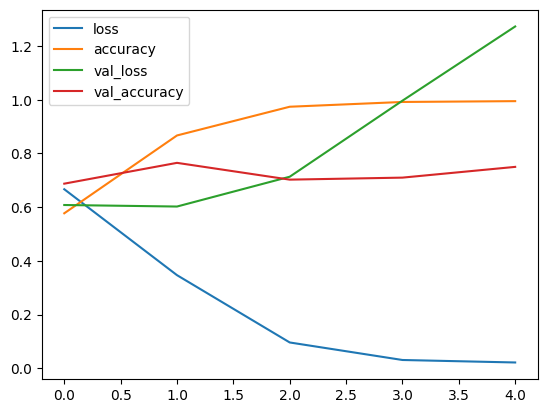

In [10]:
pd.DataFrame(history.history).plot()

En este caso estoy viendo **overfitting**, que se podria mitigar con cambios en la red:
* **Dropout** (suele aconsejarse aplicarlo tras una capa densa posterior).
* **Regularización L1/L2** (hay que ajustar bien los hiperparámetros).
* **Recurrent Batch Normalization** (no está del todo implementado en Keras).

También podemos **mejorar la calidad del modelo** con los siguientes cambios:
* **Bidirección en los LSTM** 
* **Limitar el tamaño del vocabulario**.

Por último, podemos **probar otras arquitecturas** (como Transformers).

-----

**Importante:**  Los resultados pueden variar dependiendo del número de pruebas que hagamos. Personalmente, si tuviera que hacer una apuesta "segura", apostaria por un modelo Transformer pre-aprendido (e.g., BERT) como la solución con mayor probabilidad de éxito

----



### 1.7.7 - Prueba del modelo

Finalmente, probamos nuestro modelo con el split de test:

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 10ms/step - loss: 1.2164 - accuracy: 0.7390


In [12]:
predictions = model.predict(X_test)

index = 0
print(f"Predicción: {predictions[index]}")
print(f"Real: {y_test.iloc[index]}")

32/32 [==============================] - 1s 9ms/step
Predicción: [0.9992625]
Real: 1
